In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('dataset/diabetes.csv')
data.head()

# data.isna().sum()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
col_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data[col_features]
y = data.Outcome

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
lReg = LogisticRegression(random_state=20)
lReg.fit(x_train, y_train)
yPred = lReg.predict(x_test)

In [12]:
from sklearn import metrics
mat = metrics.confusion_matrix(y_test, yPred)
print(mat)


[[88 13]
 [24 29]]


Text(0.5, 23.52222222222222, 'Predicted label')

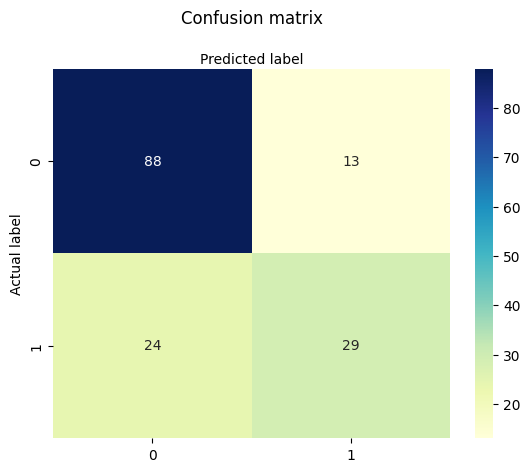

In [21]:
import seaborn as sns

className = ['0', '1']
fig,ax = plt.subplots()
tick = np.arange(len(className))
plt.xticks(tick, className)
plt.yticks(tick, className)

sns.heatmap(pd.DataFrame(mat), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')




In [23]:
from sklearn.metrics import classification_report
name = ['Non Diabetic', 'Diabetic']

report = classification_report(y_test, yPred, target_names=name)
print(report)

              precision    recall  f1-score   support

Non Diabetic       0.79      0.87      0.83       101
    Diabetic       0.69      0.55      0.61        53

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



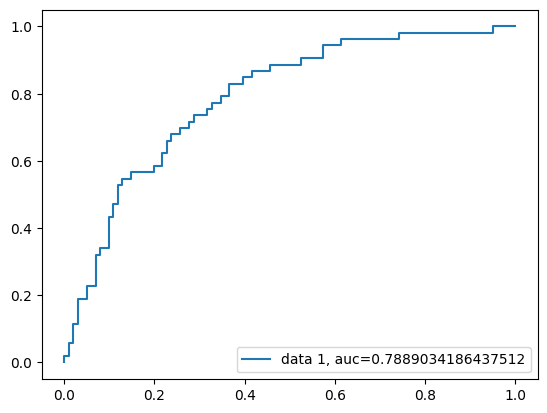

In [26]:
yPredProb = lReg.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, yPredProb)
auc = metrics.roc_auc_score(y_test, yPredProb)
plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.legend()
plt.show()